<a href="https://colab.research.google.com/github/farshidehkordi/Homework2_AI/blob/main/FullyConnectedNetwork_TP2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive/")

from google.colab import drive
drive.mount('/content/drive')
!cp -r "/content/drive/MyDrive/GLO-7030/TP2/glo-7030-ou-suis-je-h2024/" "/content/local_data/"

Mounted at /content/drive


In [ ]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'drive', 'local_data', 'sample_data']


ModifiedDropoutNetwork(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.4, inplace=False)
  (fc4): Linear(in_features=64, out_features=5, bias=True)
)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/30], Train Loss: 1.6145, Valid Loss: 1.5419, Train Acc: 24.87, Valid Acc: 29.54
Epoch [2/30], Train Loss: 1.5462, Valid Loss: 1.4897, Train Acc: 31.01, Valid Acc: 36.44
Epoch [3/30], Train Loss: 1.5039, Valid Loss: 1.4954, Train Acc: 33.87, Valid Acc: 32.62
Epoch [4/30], Train Loss: 1.4732, Valid Loss: 1.4468, Train Acc: 36.04, Valid Acc: 38.60
Epoch [5/30], Train Loss: 1.4596, Valid Loss: 1.6040, Train Acc: 36.64, Valid Acc: 30.38
Epoch [6/30], Train Loss: 1.4386, Valid Loss: 1.4384, Train Acc: 37.17, Valid Acc: 40.60
Epoch [7/30], Train Loss: 1.4178, Valid Loss: 1.4114, Train Acc: 39.04, Valid Acc: 38.13
Epoch [8/30], Train Loss: 1.4056, Valid Loss: 1.4144, Train Acc: 39.38, Valid Acc: 40.20
Epoch [9/30], Train Loss: 1.3984, Valid Loss: 1.3796, Train Acc: 39.72, Valid Acc: 41.06
Epoch [10/30], Train Loss: 1.3827, Valid Loss: 1.3558, Train Acc: 40.31, Valid Acc: 42.84
Epoch [11/30], Train Loss: 1.3696, Valid Loss: 1.3382, Train Acc: 41.23, Valid Acc: 43.70
Epoch [12/30], Trai

<ipython-input-19-d36faa5fb545>:209: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


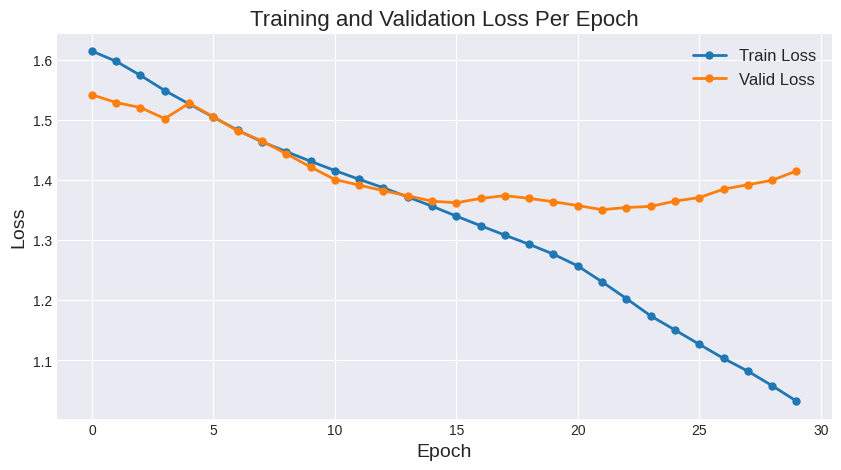

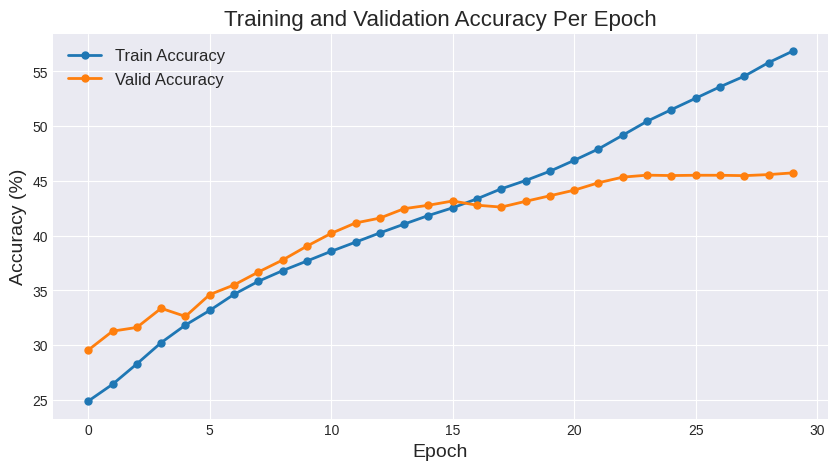

In [ ]:
# Import libraries
import os
import pandas as pd
import logging
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision import datasets, transforms
from PIL import Image

# Classes are :
# 0 - Boston
# 1 - London
# 2 - Montreal
# 3 - Paris
# 4 - Quebec

# Define the network architecture (fully connected using ReLU) :
class ModifiedDropoutNetwork(nn.Module):
    def __init__(self, num_classes=5):
        super(ModifiedDropoutNetwork, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 28 * 28, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.4)
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.4)
        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

# Hyperparameters
num_epochs = 30
batch_size = 32 #64
initial_learning_rate = 0.001
patience = 5
# k_folds = 5
# kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Load dataset
train_data_path = '/content/local_data/train'
test_data_path = '/content/local_data/test'

# train_data_path = '/content/drive/MyDrive/GLO-7030/TP2/glo-7030-ou-suis-je-h2024/train'
# test_data_path = '/content/drive/MyDrive/GLO-7030/TP2/glo-7030-ou-suis-je-h2024/test'

# Define the transform
data_transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

class SingleClassTestDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_names = sorted(os.listdir(root_dir))  # Assuming the images are named as '00000.jpg', '00001.jpg', etc.

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_names[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, 0  # Assigning the class label as 0 for all images in the test dataset

# Splitting the training dataset into train and validation sets
train_dataset = datasets.ImageFolder(root=train_data_path, transform=data_transform)
valid_size = int(0.2 * len(train_dataset))  # For example, you can use 20% of the training data for validation
train_size = len(train_dataset) - valid_size  # Adjust train_size to exclude validation set
train_dataset, valid_dataset = random_split(train_dataset, [train_size, valid_size])

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(dataset=SingleClassTestDataset(root_dir=test_data_path, transform=data_transform), batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model
model = ModifiedDropoutNetwork(num_classes=5).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=initial_learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=patience, factor=0.5)

# Training the model
train_loss_list = []
valid_loss_list = []
train_accuracy_list = []
valid_accuracy_list = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_accuracy = 100 * correct / total
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    # Validation phase
    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_loss /= len(valid_loader)
    valid_accuracy = 100 * correct / total
    valid_loss_list.append(valid_loss)
    valid_accuracy_list.append(valid_accuracy)

    # Print training and validation loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Train Acc: {train_accuracy:.2f}, Valid Acc: {valid_accuracy:.2f}')

    # Step with the scheduler
    scheduler.step(valid_loss)

# Testing the model
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.reshape(-1, 3, 28, 28).to(device) #Before : -1, 28*28
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}')

# Get and print the last learning rate
last_lr = optimizer.param_groups[0]['lr']
print(f'Last learning rate: {last_lr}')



# Set a style
plt.style.use('seaborn-darkgrid')

# Reduce data points if the list is very long
epoch_interval = max(1, len(train_loss_list) // 100)  # Plot every nth point where n depends on list size

# Create a function to smooth curves
def smooth_curve(points, factor=0.75):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(smooth_curve(train_loss_list)[::epoch_interval], '-o', label='Train Loss', linewidth=2, markersize=5)
plt.plot(smooth_curve(valid_loss_list)[::epoch_interval], '-o', label='Valid Loss', linewidth=2, markersize=5)
plt.title('Training and Validation Loss Per Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(smooth_curve(train_accuracy_list)[::epoch_interval], '-o', label='Train Accuracy', linewidth=2, markersize=5)
plt.plot(smooth_curve(valid_accuracy_list)[::epoch_interval], '-o', label='Valid Accuracy', linewidth=2, markersize=5)
plt.title('Training and Validation Accuracy Per Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [ ]:
# Output file to submission on Kaggle :

# Define class names based on the labels
class_names = ['Boston', 'London', 'Montreal', 'Paris', 'Quebec']

# Assuming 'test_loader' is set up with your custom SingleClassTestDataset
image_names = []
for img_name in test_loader.dataset.image_names:
    # Extract the numeric part before '.jpg' and remove non-digit characters
    base_name = img_name.split('.')[0]
    clean_name = ''.join(filter(str.isdigit, base_name))
    if clean_name:  # Ensure it is not empty
        image_names.append(int(clean_name))  # Convert to integer

# Placeholder list for predictions
predicted_labels = []

# Model evaluation mode
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels.extend(predicted.cpu().numpy())

# Map the predicted labels to the corresponding class names
predicted_class_names = [class_names[label] for label in predicted_labels]

# Creating a DataFrame to save to CSV
df = pd.DataFrame({
    'image_name': image_names,
    'class': predicted_class_names  # Change the column name to 'class'
})

# Convert 'image_name' column to Int32 explicitly
df['image_name'] = df['image_name'].astype('Int32')

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/GLO-7030/TP2/FC_test_predictions_3.csv', index=False)

